In [1]:
from dataset import Dataset
import pandas as pd

In [2]:
ds = Dataset()
print('There are ', len(ds.movies_df), ' movies and ', len(ds.ratings_df), ' ratings')

There are  9742  movies and  100836  ratings


In [8]:
ds.movies_df.head(20)

,movieId,title,genres,avg_rating
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",NaN
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]",3.920930
2,3,Grumpier Old Men (1995),"[Comedy, Romance]",3.431818
3,4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]",3.259615
4,5,Father of the Bride Part II (1995),[Comedy],2.357143
5,6,Heat (1995),"[Action, Crime, Thriller]",3.071429
6,7,Sabrina (1995),"[Comedy, Romance]",3.946078
7,8,Tom and Huck (1995),"[Adventure, Children]",3.185185
8,9,Sudden Death (1995),[Action],2.875000
9,10,GoldenEye (1995),"[Action, Adventure, Thriller]",3.125000


In [4]:
ds.ratings_df.head(20)

,userId,movieId,rating,timestamp,datetime
0,1,1,4.0,964982703,30-07-2000
1,1,3,4.0,964981247,30-07-2000
2,1,6,4.0,964982224,30-07-2000
3,1,47,5.0,964983815,30-07-2000
4,1,50,5.0,964982931,30-07-2000
5,1,70,3.0,964982400,30-07-2000
6,1,101,5.0,964980868,30-07-2000
7,1,110,4.0,964982176,30-07-2000
8,1,151,5.0,964984041,30-07-2000
9,1,157,5.0,964984100,30-07-2000


Text(0, 0.5, 'Number of ratings')

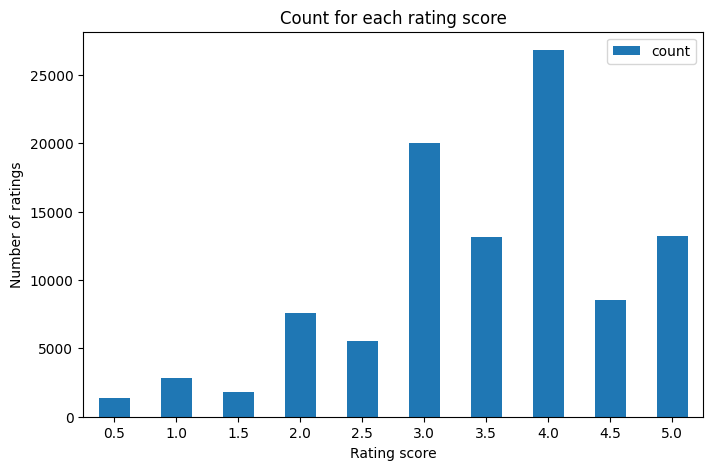

In [29]:
ax = ds.rating_count_df.reset_index().plot('rating','count', 'bar', figsize=(8, 5), rot=0, title='Count for each rating score', fontsize=10)

ax.set_xlabel("Rating score")
ax.set_ylabel("Number of ratings")

Text(0, 0.5, 'Number of movies')

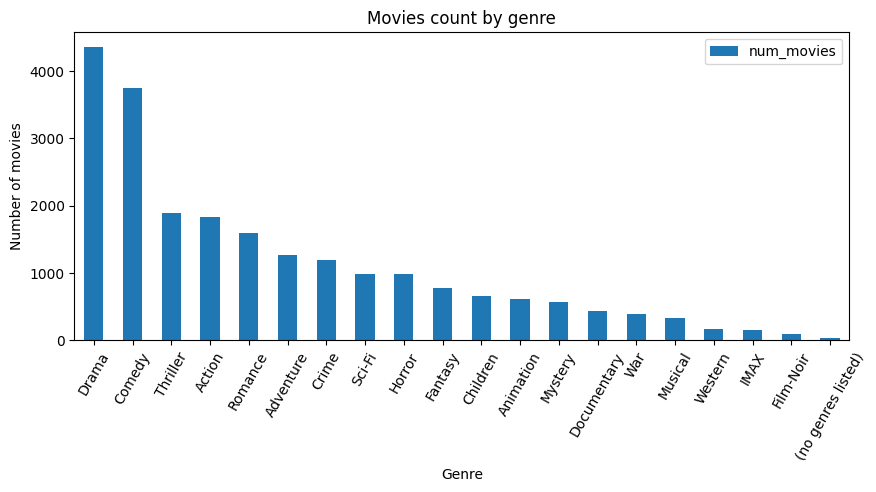

In [31]:
# Get the count of each genre
genre_distribution = ds.movies_df['genres'].explode().value_counts()
df = pd.DataFrame({'genre': genre_distribution.keys(), 'num_movies': genre_distribution.values})
ax = df.plot.bar(x='genre', y='num_movies', rot=60, figsize=(10, 4), title="Movies count by genre")

ax.set_xlabel("Genre")
ax.set_ylabel("Number of movies")

Text(0, 0.5, 'Number of movies')

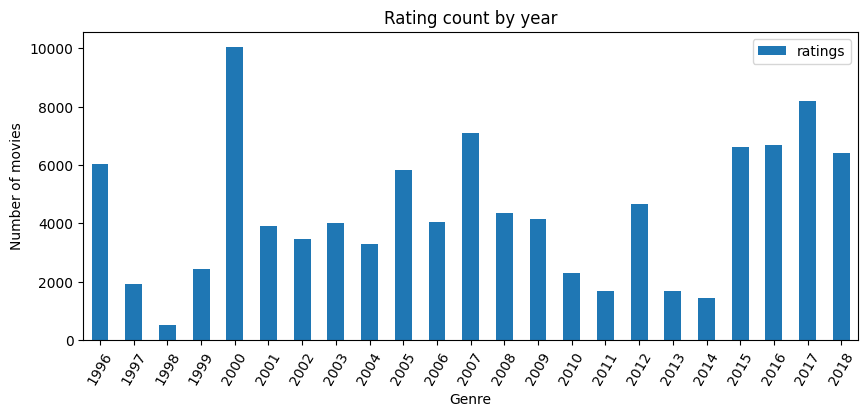

In [38]:
df = ds.ratings_df
df['year'] = pd.DatetimeIndex(df['datetime']).year
years_ratings = df['year'].explode().value_counts().sort_index()
df = pd.DataFrame({'year': years_ratings.keys(), 'ratings': years_ratings.values})
ax = df.plot.bar(x='year', y='ratings', rot=60, figsize=(10, 4), title="Rating count by year")

ax.set_xlabel("Year")
ax.set_ylabel("Number of ratings")